# Load packages and libraries

In [1]:
.libPaths()
.libPaths(new = c("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"))
.libPaths()
# sessionInfo()

Sys.setenv(RETICULATE_PYTHON="/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/bin/python")
library(reticulate)
reticulate::use_python("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/bin/python")
reticulate::use_condaenv("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF")
reticulate::py_module_available(module='leidenalg')
reticulate::import('leidenalg')
suppressMessages(library("optparse"))
suppressMessages(library(hdf5r))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(EnsDb.Hsapiens.v86))
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))
suppressMessages(library(Matrix))
suppressMessages(library(data.table))
suppressMessages(library(ggpubr))
suppressMessages(library(ggplot2))
suppressMessages(library(scDblFinder))
suppressMessages(library("tidyr"))
suppressMessages(library("tibble"))
suppressMessages(library("biovizBase"))
suppressMessages(library("patchwork"))
suppressMessages(library(glmGamPoi))
suppressMessages(library(svglite))
suppressMessages(library(RColorBrewer))
suppressMessages(library(forcats))
suppressMessages(library(cowplot))

[1] "/home/manuel.tardaguila/R/x86_64-conda-linux-gnu-library/4.3"    
[2] "/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"

[1] "/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"

[1] TRUE

Module(leidenalg)

Warning message:
“package ‘optparse’ was built under R version 4.3.3”
Warning message:
“package ‘Seurat’ was built under R version 4.3.2”
Warning message:
“package ‘Signac’ was built under R version 4.3.2”
Warning message:
“package ‘ensembldb’ was built under R version 4.3.2”
Warning message:
“package ‘BiocGenerics’ was built under R version 4.3.2”
Warning message:
“package ‘GenomicRanges’ was built under R version 4.3.2”
Warning message:
“package ‘S4Vectors’ was built under R version 4.3.2”
Warning message:
“package ‘IRanges’ was built under R version 4.3.2”
Warning message:
“package ‘GenomeInfoDb’ was built under R version 4.3.2”
Warning message:
“package ‘GenomicFeatures’ was built under R version 4.3.2”
Warning message:
“package ‘AnnotationDbi’ was built under R version 4.3.2”
Warning message:
“package ‘Biobase’ was built under R version 4.3.2”
Warning message:
“package ‘AnnotationFilter’ was built under R version 4.3.2”
Warning message:
"package 'scDblFinder' was built under R ver

## Read the merged object filtered for doublets and clusterized at high resolution

In [2]:
setwd("/group/soranzo/manuel.tardaguila/2025_K562_multiome_reanalysis/Downstream_analysis/")

In [3]:
adata<-readRDS(file="Paper_seurat_object.rds")

## Check initial metadata

In [4]:
metadata<-adata[[]]

In [9]:
cat("metadata_0\n")
cat(str(metadata))
cat("\n")
cat(str(row.names(metadata)))
cat("\n")


metadata_0
'data.frame':	11250 obs. of  71 variables:
 $ orig.ident                       : chr  "MCO_1278" "MCO_1278" "MCO_1278" "MCO_1278" ...
 $ nCount_RNA                       : num  37354 40293 29260 19171 17797 ...
 $ nFeature_RNA                     : int  7954 7919 7284 6099 5658 7323 9426 6772 5578 6399 ...
 $ percent.mt                       : num  0.361 0.541 0.492 1.028 1.472 ...
 $ nCount_RNA_raw                   : num  37674 40650 29549 19823 18338 ...
 $ nFeature_RNA_raw                 : int  7954 7922 7285 6195 5669 7329 9426 6788 5617 6403 ...
 $ nCount_ATAC                      : num  66572 57026 32772 18245 27543 ...
 $ nFeature_ATAC                    : int  41180 36683 25139 14988 21290 34388 26676 6595 22047 1213 ...
 $ gex_raw_reads                    : int  99956 112159 81252 50855 46372 69745 128286 71550 37829 51375 ...
 $ gex_mapped_reads                 : int  96927 108799 78679 49318 44903 67399 124403 69481 36718 49839 ...
 $ gex_conf_intergenic_reads  

## Order genotype factor

In [10]:
names(summary(as.factor(adata@meta.data$Genotype)))
cat("\n")

summary(as.factor(adata@meta.data$Genotype))
cat("\n")

[1] "wt"              "rs139141690_HET" "rs139141690"     "Del_16bp"       
[5] "Del_80bp"

wt rs139141690_HET     rs139141690        Del_16bp        Del_80bp 
           2663            1878            1326            2575            2808

In [11]:
adata@meta.data$Genotype<-factor(adata@meta.data$Genotype,
                                levels=c('wt','rs139141690_HET','rs139141690','Del_16bp','Del_80bp'),
                                ordered=TRUE)

In [12]:
summary(adata@meta.data$Genotype)
cat("\n")

wt rs139141690_HET     rs139141690        Del_16bp        Del_80bp 
           2663            1878            1326            2575            2808

# Graphs of clusterization

In [13]:
 path_graphs = paste("/group/soranzo/manuel.tardaguila/2025_K562_multiome_reanalysis/Downstream_analysis/",'graphs_final_object','/',sep='')
  
  if (file.exists(path_graphs)){
    
    
  }else{
    
    dir.create(file.path(path_graphs))
    
  }#path_Downstream_analysis

## Graph WNN by SampleID

png 
  2

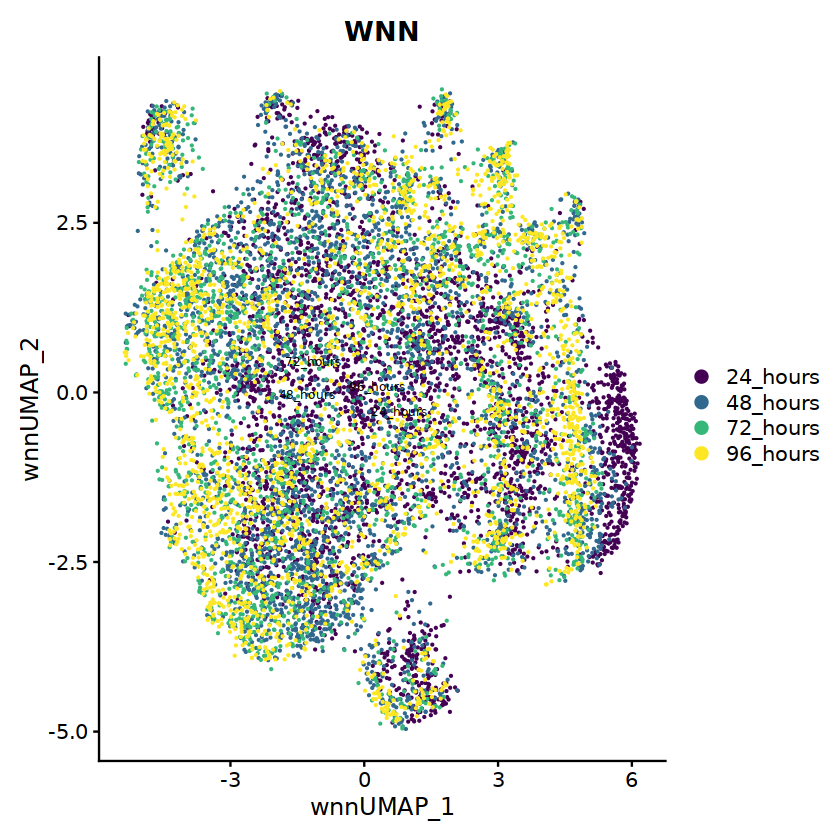

In [14]:
p3 <- DimPlot(adata, reduction = "umap.wnn", group.by = "time_point", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")
p3  & theme(plot.title = element_text(hjust = 0.5))

setwd(path_graphs)
png(file='WNN_by_SampleID.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

## Graph WNN by Seurat cluster

png 
  2

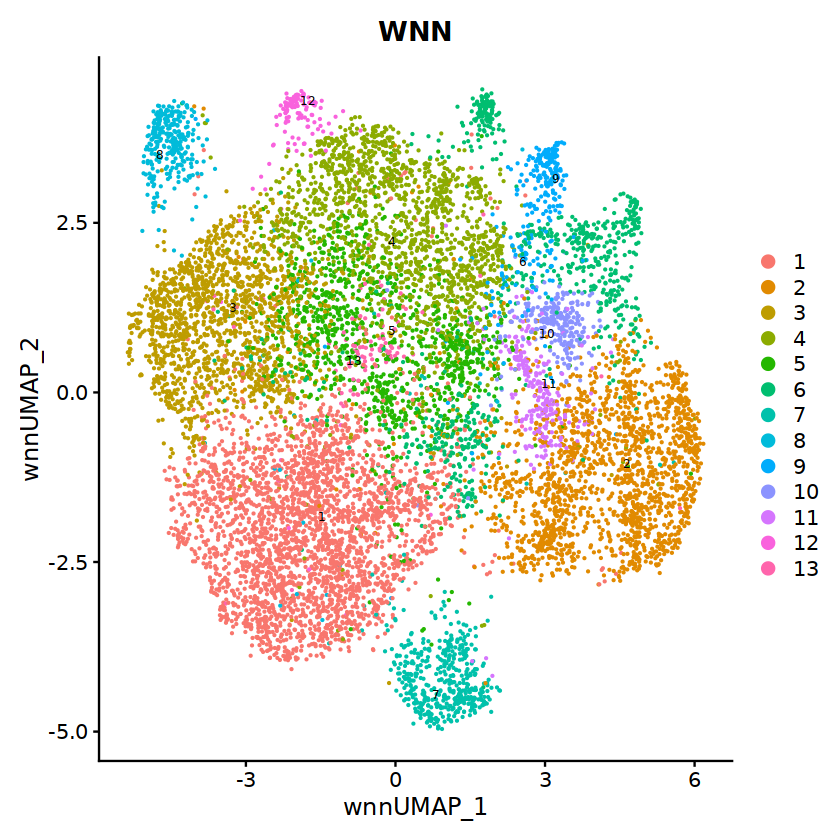

In [15]:
p3 <- DimPlot(adata, reduction = "umap.wnn", group.by = "seurat_clusters", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")
p3  & theme(plot.title = element_text(hjust = 0.5))

setwd(path_graphs)
png(file='WNN_by_Seurat_cluster.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

## Graph WNN_Intermediate_QC_metrics

png 
  2

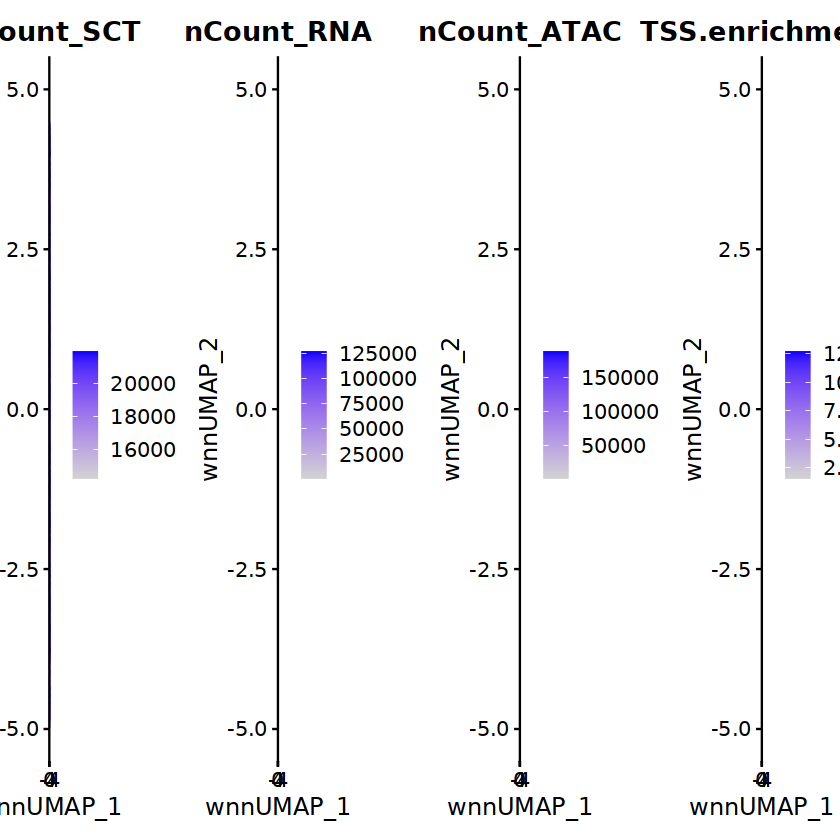

In [16]:
p6 <- FeaturePlot(adata, features = c("nCount_SCT", "nCount_RNA", "nCount_ATAC",'TSS.enrichment'), ncol = 4,
                  reduction = 'umap.wnn')

p6

setwd(path_graphs)
png(file='WNN_Intermediate_QC_metrics.png', width =1000, height = 500)
p6
dev.off()

png 
  2

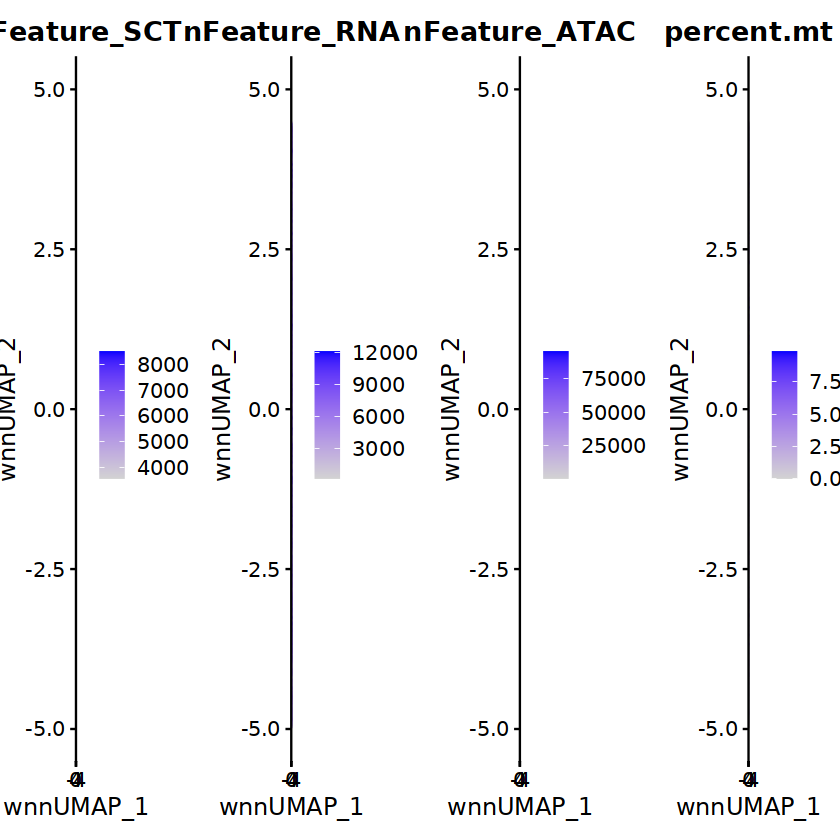

In [17]:
p6 <- FeaturePlot(adata, features = c("nFeature_SCT", "nFeature_RNA", "nFeature_ATAC",'percent.mt'), ncol = 4,
                  reduction = 'umap.wnn')

p6

setwd(path_graphs)
png(file='WNN_Intermediate_QC_metrics_2.png', width =1000, height = 500)
p6
dev.off()

## Graph WNN by marker genes

In [18]:
DefaultAssay(adata) <- 'SCT'

genes<-Features(adata)

str(genes)

 chr [1:29123] "MIR1302-2HG" "OR4F5" "AL627309.1" "AL627309.3" "AL627309.5" ...


png 
  2

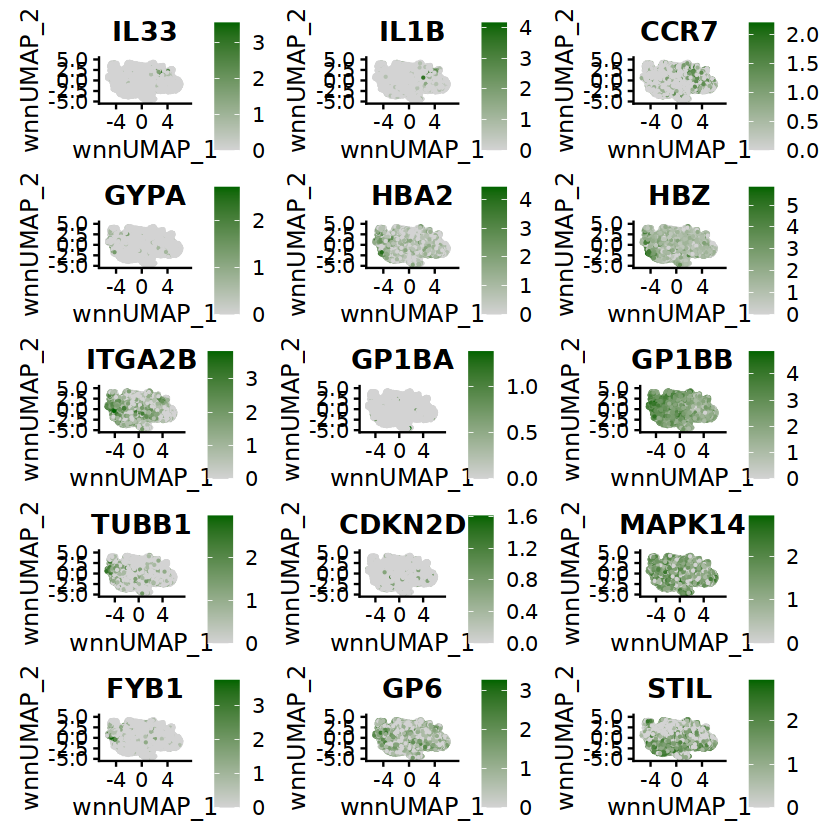

In [19]:
## Graph 

DefaultAssay(adata) <- 'SCT'


p5 <- FeaturePlot(adata, features = c('IL33','IL1B','CCR7'),
                  reduction = 'umap.wnn', 
                  cols = c("lightgrey","darkgreen"), ncol = 3)


p5_1 <- FeaturePlot(adata, features = c('GYPA','HBA2','HBZ'),
                    reduction = 'umap.wnn', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p5_3 <- FeaturePlot(adata, features = c('ITGA2B','GP1BA', 'GP1BB'),
                    reduction = 'umap.wnn', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p_7 <- FeaturePlot(adata, features = c('FYB1','GP6','STIL'),
                    reduction = 'umap.wnn', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p_6 <- FeaturePlot(adata, features = c('TUBB1','CDKN2D','MAPK14'),
                    reduction = 'umap.wnn', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)


p5 / p5_1 / p5_3 / p_6 / p_7

setwd(path_graphs)
png(file='UMAP_marker_genes.png', width =1000, height = 1500)
p5 / p5_1 / p5_3 / p_6 / p_7
dev.off()

# Violin graphs to decide if a cluster is lowQuality

## Percent.mt

png 
  2

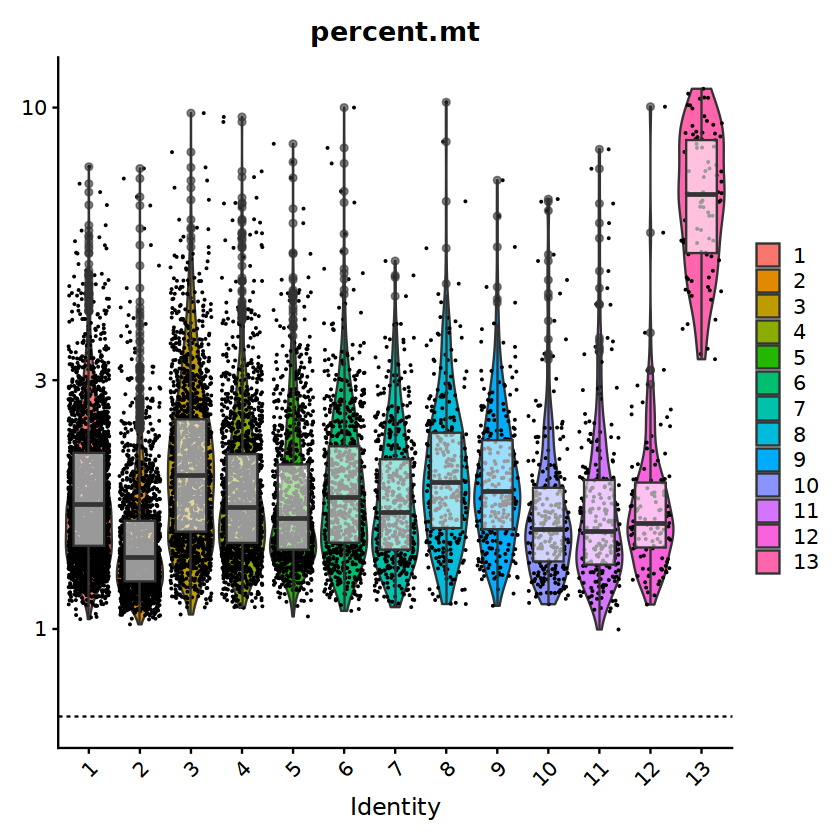

In [20]:
p10 <- VlnPlot(adata, features='percent.mt', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$percent.mt), linetype='dashed')


p10
setwd(path_graphs)
png(file='Vln_percent.mt.png', width =2000, height = 500)
p10
dev.off()

## nCount_SCT

In [21]:
p10 <- VlnPlot(adata, features='nCount_SCT', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$nCount_SCT), linetype='dashed')



setwd(path_graphs)
png(file='Vln_nCount_SCT.png', width =2000, height = 500)
p10
dev.off()

png 
  2

## nFeature_SCT

In [22]:
p10 <- VlnPlot(adata, features='nFeature_SCT', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$nFeature_SCT), linetype='dashed')



setwd(path_graphs)
png(file='Vln_nFeature_SCT.png', width =2000, height = 500)
p10
dev.off()

png 
  2

## nCount_ATAC

In [23]:
p10 <- VlnPlot(adata, features='nCount_ATAC', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$nFeature_ATAC), linetype='dashed')


setwd(path_graphs)
png(file='Vln_nCount_ATAC.png', width =2000, height = 500)
p10
dev.off()



png 
  2

## nFeature_ATAC

In [24]:
####

p10 <- VlnPlot(adata, features='nFeature_ATAC', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$nCount_RNA), linetype='dashed')

setwd(path_graphs)
png(file='Vln_nFeature_ATAC.png', width =2000, height = 500)
p10
dev.off()

png 
  2

## nCount_RNA

In [25]:
####

p10 <- VlnPlot(adata, features='nCount_RNA', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$nCount_RNA), linetype='dashed')



setwd(path_graphs)
png(file='Vln_nCount_RNA.png', width =2000, height = 500)
p10
dev.off()

png 
  2

## nFeature_RNA

In [26]:
####

p10 <- VlnPlot(adata, features='nFeature_RNA', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$nFeature_RNA), linetype='dashed')



setwd(path_graphs)
png(file='Vln_nFeature_RNA.png', width =2000, height = 500)
p10
dev.off()


png 
  2

## TSS.enrichment

In [27]:
####

p10 <- VlnPlot(adata, features='TSS.enrichment', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$TSS.enrichment), linetype='dashed')



setwd(path_graphs)
png(file='Vln_TSS.enrichment.png', width =2000, height = 500)
p10
dev.off()

png 
  2

## amulet_nFrags

In [28]:
####

p10 <- VlnPlot(adata, features='amulet_nFrags', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$amulet_nFrags), linetype='dashed')



setwd(path_graphs)
png(file='Vln_amulet_nFrags.png', width =2000, height = 500)
p10
dev.off()


png 
  2

## scDblFinder.score

In [29]:
####

p10 <- VlnPlot(adata, features='scDblFinder.score', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$scDblFinder.score), linetype='dashed')



setwd(path_graphs)
png(file='Vln_scDblFinder.score.png', width =2000, height = 500)
p10
dev.off()

png 
  2

## scDblFinder.score_atac

In [30]:
####

p10 <- VlnPlot(adata, features='scDblFinder.score_atac', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$scDblFinder.score_atac), linetype='dashed')



setwd(path_graphs)
png(file='Vln_scDblFinder.score_atac.png', width =2000, height = 500)
p10
dev.off()

png 
  2

# Cell annotation

## Dotplot on marker genes

In [31]:
markers<-c(c('IL33','IL1B','CCR7'),c('GYPA','HBA2','HBZ'),c('ITGA2B','GP1BA', 'GP1BB'),c('FYB1','GP6','STIL'),c('TUBB1','CDKN2D','MAPK14'))

markers

[1] "IL33"   "IL1B"   "CCR7"   "GYPA"   "HBA2"   "HBZ"    "ITGA2B" "GP1BA" 
 [9] "GP1BB"  "FYB1"   "GP6"    "STIL"   "TUBB1"  "CDKN2D" "MAPK14"

png 
  2

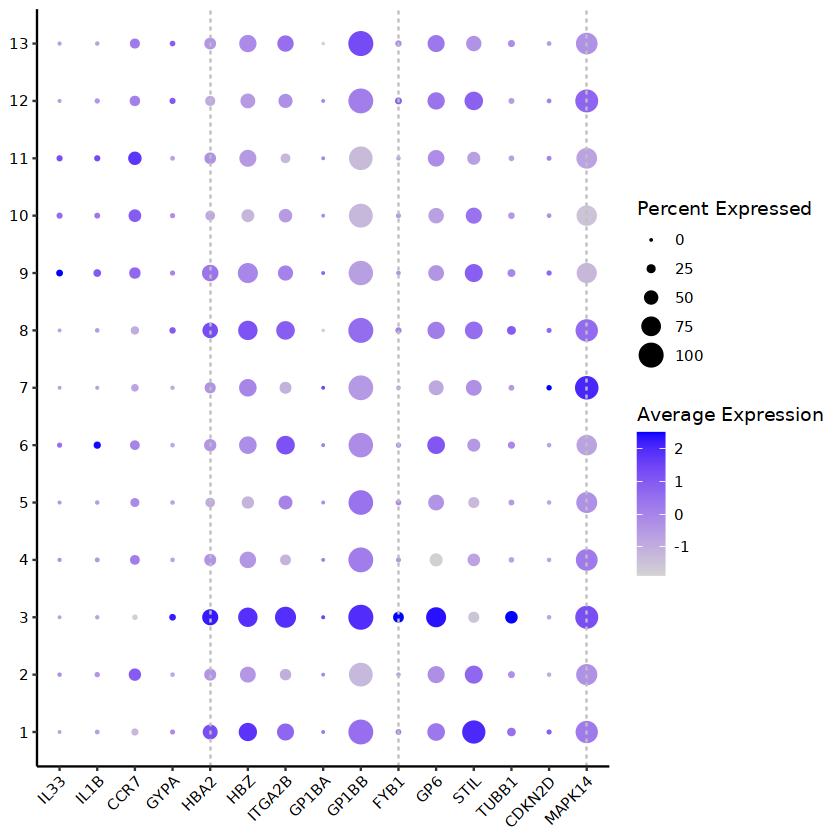

In [32]:
dotplot3<-DotPlot(
  adata,
  features=markers,
  assay = "SCT",
    group.by="seurat_clusters")+
geom_vline(xintercept=c(5,10,15,20,25,30,35), linetype="dashed", color="gray")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))
dotplot3

setwd(path_graphs)
png(file='Dotplot_marker_genes_by_Integrated_annotation_THREE.png', width =1000)
dotplot3
dev.off()

## Barplot time vs clone line vs seurat cluster

In [33]:
met<-adata[[]]

In [34]:
colnames(met)

[1] "orig.ident"                        "nCount_RNA"                       
 [3] "nFeature_RNA"                      "percent.mt"                       
 [5] "nCount_RNA_raw"                    "nFeature_RNA_raw"                 
 [7] "nCount_ATAC"                       "nFeature_ATAC"                    
 [9] "gex_raw_reads"                     "gex_mapped_reads"                 
[11] "gex_conf_intergenic_reads"         "gex_conf_exonic_reads"            
[13] "gex_conf_intronic_reads"           "gex_conf_exonic_unique_reads"     
[15] "gex_conf_exonic_antisense_reads"   "gex_conf_exonic_dup_reads"        
[17] "gex_exonic_umis"                   "gex_conf_intronic_unique_reads"   
[19] "gex_conf_intronic_antisense_reads" "gex_conf_intronic_dup_reads"      
[21] "gex_intronic_umis"                 "gex_conf_txomic_unique_reads"     
[23] "gex_umis_count"                    "gex_genes_count"                  
[25] "atac_raw_reads"                    "atac_unmapped_reads"              
[27] "atac_lowmapq"                      "atac_dup_reads"                   
[29] "atac_chimeric_reads"               "atac_mitochondrial_reads"         
[31] "atac_fragments"                    "atac_TSS_fragments"               
[33] "atac_peak_region_fragments"        "atac_peak_region_cutsites"        
[35] "TSS.enrichment"                    "TSS.percentile"                   
[37] "scDblFinder.class"                 "scDblFinder.score"                
[39] "scDblFinder.weighted"              "scDblFinder.cxds_score"           
[41] "scDblFinder.class_atac"            "scDblFinder.score_atac"           
[43] "scDblFinder.weighted_atac"         "scDblFinder.cxds_score_atac"      
[45] "No_assigned_GFPbc"                 "Assigned_GFPbc"                   
[47] "Assigned_GFPgenotype"              "DBL_comb"                         
[49] "amulet_nFrags"                     "amulet_uniqFrags"                 
[51] "amulet_nAbove2"                    "amulet_total.nAbove2"             
[53] "amulet_p.value"                    "amulet_q.value"                   
[55] "doublet_amulet"                    "nCount_SCT"                       
[57] "nFeature_SCT"                      "SCT.weight"                       
[59] "ATAC.weight"                       "wsnn_res.2"                       
[61] "seurat_clusters"                   "doublet"                          
[63] "wsnn_res.0.5"                      "new_categ"                        
[65] "Genotype"                          "time_point"                       
[67] "diff_groups"                       "seurat_clusters_by_diff_groups"   
[69] "Assignation_GEX_not_amplified"     "clone_line"                       
[71] "Diff"

In [35]:
met.dt<-data.table(met,key=c("clone_line","seurat_clusters",'time_point'))

In [36]:
#str(met.dt)

In [37]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [38]:
met.dt<-data.table(met, key=c("clone_line",'time_point'))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [39]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("clone_line",'time_point'))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [40]:
str(Freq.table)

'data.frame':	486 obs. of  6 variables:
 $ clone_line     : Ord.factor w/ 11 levels "wt_1"<"wt_2"<..: 8 8 8 8 8 8 8 8 8 8 ...
 $ time_point     : Ord.factor w/ 4 levels "24_hours"<"48_hours"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ seurat_clusters: Factor w/ 13 levels "1","2","3","4",..: 1 11 8 5 2 12 9 6 3 13 ...
 $ Freq           : int  54 32 2 69 660 8 2 41 32 15 ...
 $ TOTAL          : int  1101 1101 1101 1101 1101 1101 1101 1101 1101 1101 ...
 $ Perc           : num  4.9 2.91 0.18 6.27 59.95 ...


In [41]:
summary(Freq.table$TOTAL)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    6.0   141.0   238.0   283.6   321.0  1101.0 

In [42]:
met.dt<-data.table(met, key=c("clone_line"))
Freq.table_CT_annotation<-as.data.frame(met.dt[,.(Freq_genotypes=.N),by=key(met.dt)], stringsAsFactors=F)



In [43]:
str(Freq.table_CT_annotation)

'data.frame':	11 obs. of  2 variables:
 $ clone_line    : Ord.factor w/ 11 levels "wt_1"<"wt_2"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq_genotypes: int  287 1290 1086 1878 713 570 43 2575 1432 652 ...


In [44]:
Freq.table<-merge(Freq.table,
                  Freq.table_CT_annotation,
                  by=c("clone_line"))

### Filter x axis by frequency

In [45]:
Freq.table_filtered<-Freq.table#[which(Freq.table$TOTAL >= 100),]


str(Freq.table_filtered)

'data.frame':	486 obs. of  7 variables:
 $ clone_line     : Ord.factor w/ 11 levels "wt_1"<"wt_2"<..: 8 8 8 8 8 8 8 8 8 8 ...
 $ time_point     : Ord.factor w/ 4 levels "24_hours"<"48_hours"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ seurat_clusters: Factor w/ 13 levels "1","2","3","4",..: 1 11 8 5 2 12 9 6 3 13 ...
 $ Freq           : int  54 32 2 69 660 8 2 41 32 15 ...
 $ TOTAL          : int  1101 1101 1101 1101 1101 1101 1101 1101 1101 1101 ...
 $ Perc           : num  4.9 2.91 0.18 6.27 59.95 ...
 $ Freq_genotypes : int  2575 2575 2575 2575 2575 2575 2575 2575 2575 2575 ...


In [46]:
vector_colors_seurat_clusters<-c(brewer.pal(9, "Set1"),brewer.pal(12, "Set3"),"white")


length(vector_colors_seurat_clusters)

[1] 22

-------------------------------------->	0 25 50 75 100


Warning message:
"The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead."
Warning message:
"The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead."


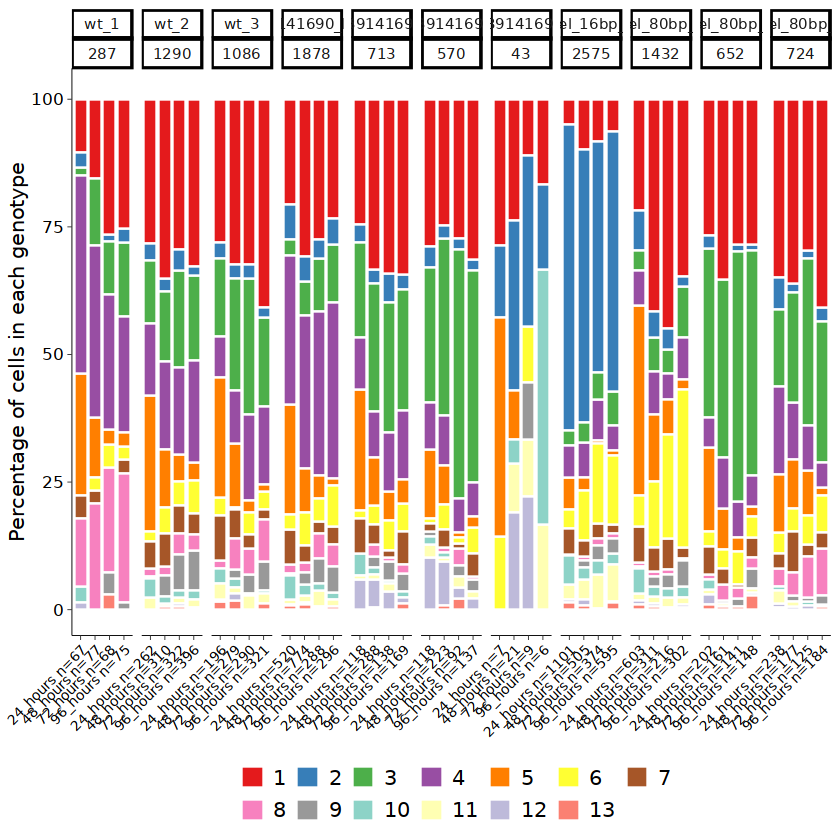

In [47]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<- Freq.table_filtered %>%
     mutate(myaxis = paste0(time_point," ","n=", TOTAL), drop=T) %>%
     mutate(myaxis=fct_reorder(myaxis,as.numeric(time_point)), drop=T) %>%
        ggplot(aes(x=myaxis, y=Perc, fill=seurat_clusters)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each genotype",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=vector_colors_seurat_clusters,
                      drop=F,
                      name="Alsinet model")

stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(. ~ clone_line+Freq_genotypes, scales='free_x', space='free_x', switch="y")+   
    scale_x_discrete(name="Seurat clusters", drop=TRUE)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=12),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=8,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=12, color="black", family="sans"),
                  legend.key.size = unit(0.5, 'cm'), #change legend key size
                  legend.key.height = unit(0.5, 'cm'), #change legend key height
                  legend.key.width = unit(0.5, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=2,byrow=TRUE))



stacked_barplot
  




  

In [48]:
setwd(path_graphs)

svgname<-paste("Stacked_barplot_clone_line_vs_cluster_and_time_point_OTHER",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="svg", width =13, height = 13)
}

## Barplot time vs Genotype vs seurat cluster

In [49]:
met<-adata[[]]

In [50]:
colnames(met)

[1] "orig.ident"                        "nCount_RNA"                       
 [3] "nFeature_RNA"                      "percent.mt"                       
 [5] "nCount_RNA_raw"                    "nFeature_RNA_raw"                 
 [7] "nCount_ATAC"                       "nFeature_ATAC"                    
 [9] "gex_raw_reads"                     "gex_mapped_reads"                 
[11] "gex_conf_intergenic_reads"         "gex_conf_exonic_reads"            
[13] "gex_conf_intronic_reads"           "gex_conf_exonic_unique_reads"     
[15] "gex_conf_exonic_antisense_reads"   "gex_conf_exonic_dup_reads"        
[17] "gex_exonic_umis"                   "gex_conf_intronic_unique_reads"   
[19] "gex_conf_intronic_antisense_reads" "gex_conf_intronic_dup_reads"      
[21] "gex_intronic_umis"                 "gex_conf_txomic_unique_reads"     
[23] "gex_umis_count"                    "gex_genes_count"                  
[25] "atac_raw_reads"                    "atac_unmapped_reads"              
[27] "atac_lowmapq"                      "atac_dup_reads"                   
[29] "atac_chimeric_reads"               "atac_mitochondrial_reads"         
[31] "atac_fragments"                    "atac_TSS_fragments"               
[33] "atac_peak_region_fragments"        "atac_peak_region_cutsites"        
[35] "TSS.enrichment"                    "TSS.percentile"                   
[37] "scDblFinder.class"                 "scDblFinder.score"                
[39] "scDblFinder.weighted"              "scDblFinder.cxds_score"           
[41] "scDblFinder.class_atac"            "scDblFinder.score_atac"           
[43] "scDblFinder.weighted_atac"         "scDblFinder.cxds_score_atac"      
[45] "No_assigned_GFPbc"                 "Assigned_GFPbc"                   
[47] "Assigned_GFPgenotype"              "DBL_comb"                         
[49] "amulet_nFrags"                     "amulet_uniqFrags"                 
[51] "amulet_nAbove2"                    "amulet_total.nAbove2"             
[53] "amulet_p.value"                    "amulet_q.value"                   
[55] "doublet_amulet"                    "nCount_SCT"                       
[57] "nFeature_SCT"                      "SCT.weight"                       
[59] "ATAC.weight"                       "wsnn_res.2"                       
[61] "seurat_clusters"                   "doublet"                          
[63] "wsnn_res.0.5"                      "new_categ"                        
[65] "Genotype"                          "time_point"                       
[67] "diff_groups"                       "seurat_clusters_by_diff_groups"   
[69] "Assignation_GEX_not_amplified"     "clone_line"                       
[71] "Diff"

In [51]:
met.dt<-data.table(met,key=c("Genotype","seurat_clusters",'time_point'))

In [52]:
#str(met.dt)

In [53]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [54]:
met.dt<-data.table(met, key=c("Genotype",'time_point'))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [55]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("Genotype",'time_point'))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [56]:
str(Freq.table)

'data.frame':	256 obs. of  6 variables:
 $ Genotype       : Ord.factor w/ 5 levels "wt"<"rs139141690_HET"<..: 4 4 4 4 4 4 4 4 4 4 ...
 $ time_point     : Ord.factor w/ 4 levels "24_hours"<"48_hours"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ seurat_clusters: Factor w/ 13 levels "1","2","3","4",..: 1 11 8 5 2 12 9 6 3 13 ...
 $ Freq           : int  54 32 2 69 660 8 2 41 32 15 ...
 $ TOTAL          : int  1101 1101 1101 1101 1101 1101 1101 1101 1101 1101 ...
 $ Perc           : num  4.9 2.91 0.18 6.27 59.95 ...


In [57]:
summary(Freq.table$TOTAL)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  239.0   374.0   532.0   566.8   680.0  1101.0 

In [58]:
met.dt<-data.table(met, key=c("Genotype"))
Freq.table_CT_annotation<-as.data.frame(met.dt[,.(Freq_genotypes=.N),by=key(met.dt)], stringsAsFactors=F)



In [59]:
str(Freq.table_CT_annotation)

'data.frame':	5 obs. of  2 variables:
 $ Genotype      : Ord.factor w/ 5 levels "wt"<"rs139141690_HET"<..: 1 2 3 4 5
 $ Freq_genotypes: int  2663 1878 1326 2575 2808


In [60]:
Freq.table<-merge(Freq.table,
                  Freq.table_CT_annotation,
                  by=c("Genotype"))

### Filter x axis by frequency

In [61]:
Freq.table_filtered<-Freq.table#[which(Freq.table$TOTAL >= 100),]


str(Freq.table_filtered)

'data.frame':	256 obs. of  7 variables:
 $ Genotype       : Ord.factor w/ 5 levels "wt"<"rs139141690_HET"<..: 4 4 4 4 4 4 4 4 4 4 ...
 $ time_point     : Ord.factor w/ 4 levels "24_hours"<"48_hours"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ seurat_clusters: Factor w/ 13 levels "1","2","3","4",..: 1 11 8 5 2 12 9 6 3 13 ...
 $ Freq           : int  54 32 2 69 660 8 2 41 32 15 ...
 $ TOTAL          : int  1101 1101 1101 1101 1101 1101 1101 1101 1101 1101 ...
 $ Perc           : num  4.9 2.91 0.18 6.27 59.95 ...
 $ Freq_genotypes : int  2575 2575 2575 2575 2575 2575 2575 2575 2575 2575 ...


In [62]:
vector_colors_seurat_clusters<-c(brewer.pal(9, "Set1"),brewer.pal(12, "Set3"),"white")


length(vector_colors_seurat_clusters)

[1] 22

-------------------------------------->	0 25 50 75 100


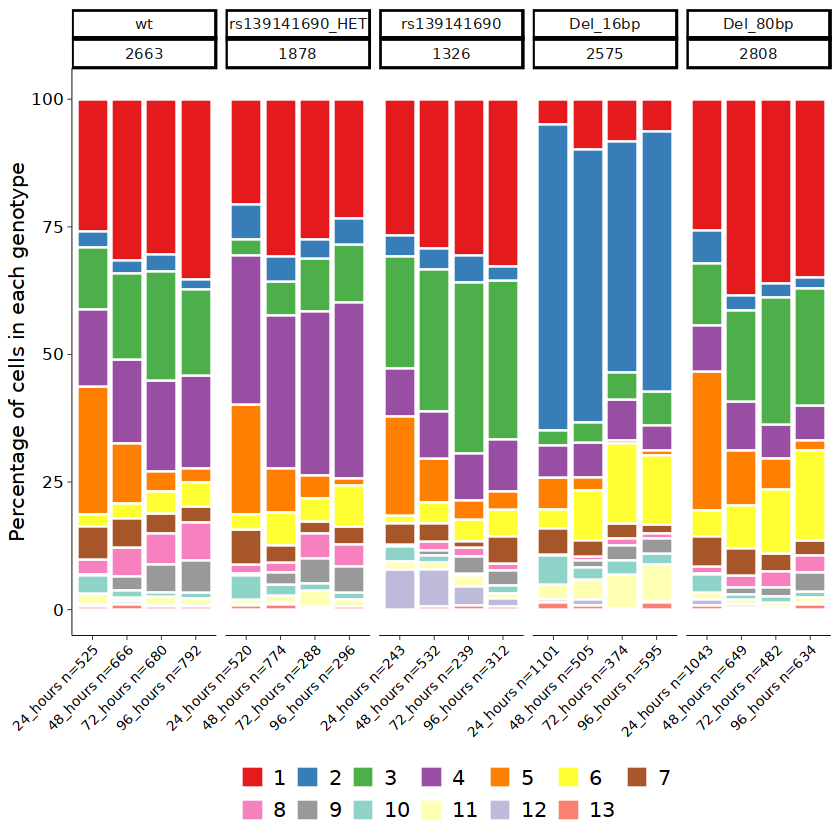

In [63]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<- Freq.table_filtered %>%
     mutate(myaxis = paste0(time_point," ","n=", TOTAL), drop=T) %>%
     mutate(myaxis=fct_reorder(myaxis,as.numeric(time_point)), drop=T) %>%
        ggplot(aes(x=myaxis, y=Perc, fill=seurat_clusters)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each genotype",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=vector_colors_seurat_clusters,
                      drop=F,
                      name="Alsinet model")

stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(. ~ Genotype+Freq_genotypes, scales='free_x', space='free_x', switch="y")+   
    scale_x_discrete(name="Seurat clusters", drop=TRUE)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=12),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=8,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=12, color="black", family="sans"),
                  legend.key.size = unit(0.5, 'cm'), #change legend key size
                  legend.key.height = unit(0.5, 'cm'), #change legend key height
                  legend.key.width = unit(0.5, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=2,byrow=TRUE))



stacked_barplot
  




  

In [64]:
setwd(path_graphs)

svgname<-paste("Stacked_barplot_Genotype_vs_cluster_and_time_point",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="svg", width =13, height = 13)
}

## Define cell annotation based on cell surface expression

### Define marker_genes

In [65]:
marker_genes<-c('ITGA2B','GYPA','IL33','IL1B','CCR7','FYB1','GP6','HBA2','HBZ','HBQ1','KIF15','STIL','ANAPC7')

### Subset to wt cells

In [66]:
summary(adata@meta.data$Genotype)

wt rs139141690_HET     rs139141690        Del_16bp        Del_80bp 
           2663            1878            1326            2575            2808

In [67]:
adata_WT<-subset(adata, Genotype == "wt")

adata_WT

An object of class Seurat 
459097 features across 2663 samples within 4 assays 
Active assay: SCT (29123 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 3 other assays present: RNA, RNA_raw, ATAC
 5 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, umap.wnn

### Retrieve the information from the DotPlot function of Seurat for the SCT normalization of the RNA-seq data

In [68]:
Idents(adata_WT) = 'seurat_clusters'

Dotplot_object <- DotPlot(object = adata_WT, features = marker_genes, assay="SCT")

# cat("Dotplot_object_0\n")
# cat(str(Dotplot_object))
# cat("\n")

df_dotplot<-as.data.frame(Dotplot_object$data)

cat("df_dotplot_0\n")
cat(str(df_dotplot))
cat("\n")

df_dotplot_0
'data.frame':	169 obs. of  5 variables:
 $ avg.exp       : num  1.8213 0.0935 0.0048 0.054 0.2122 ...
 $ pct.exp       : num  59.47 7.19 0.36 4.92 17.63 ...
 $ features.plot : Factor w/ 13 levels "ITGA2B","GYPA",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ id            : Factor w/ 13 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ avg.exp.scaled: num  0.6112 -0.0176 -0.6179 -0.5723 -0.7778 ...



### Dotplot before reordering the seurat clusters

df_dotplot_1
'data.frame':	169 obs. of  6 variables:
 $ avg.exp        : num  1.8213 0.0935 0.0048 0.054 0.2122 ...
 $ pct.exp        : num  59.47 7.19 0.36 4.92 17.63 ...
 $ Symbol         : Ord.factor w/ 13 levels "ANAPC7"<"STIL"<..: 13 12 11 10 9 8 7 6 5 4 ...
 $ seurat_clusters: Factor w/ 13 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ avg.exp.scaled : num  0.6112 -0.0176 -0.6179 -0.5723 -0.7778 ...
 $ Assay          : chr  "scRNA-seq" "scRNA-seq" "scRNA-seq" "scRNA-seq" ...

df_dotplot_1
'data.frame':	169 obs. of  7 variables:
 $ avg.exp        : num  1.8213 0.0935 0.0048 0.054 0.2122 ...
 $ pct.exp        : num  59.47 7.19 0.36 4.92 17.63 ...
 $ Symbol         : Ord.factor w/ 13 levels "ANAPC7"<"STIL"<..: 13 12 11 10 9 8 7 6 5 4 ...
 $ seurat_clusters: Factor w/ 13 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ avg.exp.scaled : num  0.6112 -0.0176 -0.6179 -0.5723 -0.7778 ...
 $ Assay          : chr  "scRNA-seq" "scRNA-seq" "scRNA-seq" "scRNA-seq" ...
 $ GENE_CLASS

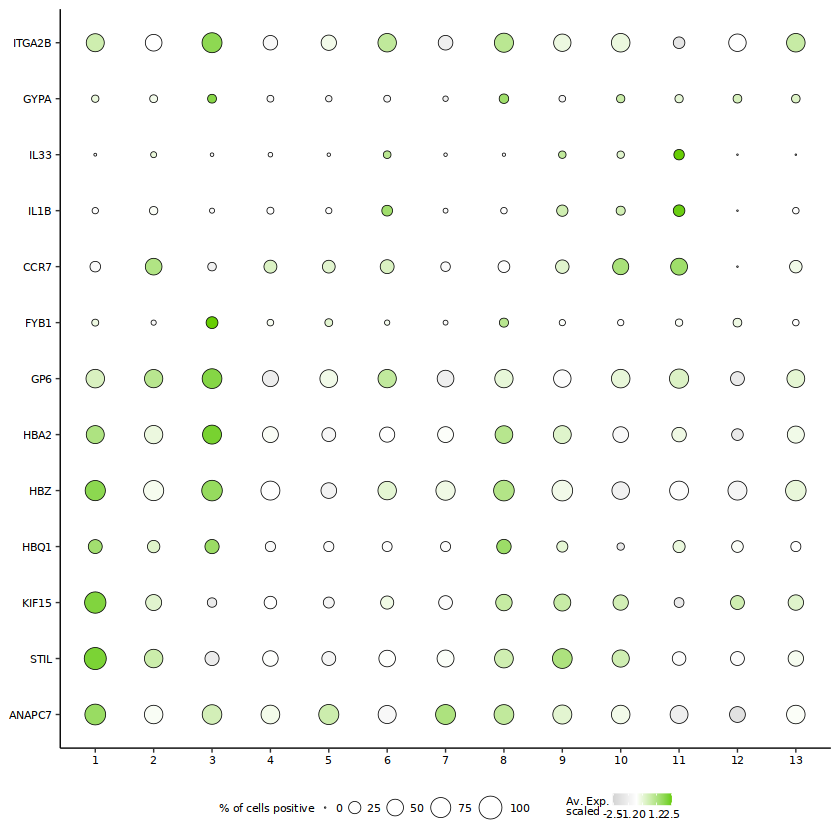

In [69]:
DEBUG <- 1

if(dim(df_dotplot)[1] >0){
    
    #### change names of columns
    
    colnames(df_dotplot)[which(colnames(df_dotplot) == 'id')]<-'seurat_clusters'
    colnames(df_dotplot)[which(colnames(df_dotplot) == 'features.plot')]<-'Symbol'
    
    df_dotplot$Symbol<-as.character(df_dotplot$Symbol)
    df_dotplot$Assay<-'scRNA-seq'
    
    #### order by the marker genes order shown in the Figure 6 Panel C
    
    df_dotplot$Symbol<-factor(df_dotplot$Symbol,
                              levels=rev(marker_genes),
                              ordered=T)
      
    
  
    cat("df_dotplot_1\n")
    cat(str(df_dotplot))
    cat("\n")
    
    #### Classify the genes in the broad categories shown in the Figure 6 Panel C
        
    
    df_dotplot$GENE_CLASS<-NA
    
    df_dotplot$GENE_CLASS[which(df_dotplot$Symbol%in%c('ITGA2B','GYPA'))]<-'Flow cyt markers'
    df_dotplot$GENE_CLASS[which(df_dotplot$Symbol%in%c("IL1B","IL33","CCR7"))]<-'Myeloid leukemia markers'
    df_dotplot$GENE_CLASS[which(df_dotplot$Symbol%in%c("GP6","FYB1"))]<-'Megakaryocyte markers'
    df_dotplot$GENE_CLASS[which(df_dotplot$Symbol%in%c("HBQ1","HBZ","HBA2"))]<-'Hemoglobin genes'
    df_dotplot$GENE_CLASS[which(df_dotplot$Symbol%in%c("ANAPC7","STIL","KIF15"))]<-'Meakaryocyte polyploidization'
    df_dotplot$GENE_CLASS[which(df_dotplot$Symbol%in%c("FOXM1","SPI1",'MEIS3','FOSB','JUNB','TCF7L2','CUX1'))]<-'ChIP_TFs'
    
    df_dotplot$GENE_CLASS<-factor(df_dotplot$GENE_CLASS,
                                            levels=c('Meakaryocyte polyploidization','Hemoglobin genes','Megakaryocyte markers','Myeloid leukemia markers','Flow cyt markers','ChIP_TFs'),
                                            ordered=T)
    
    cat("df_dotplot_1\n")
    cat(str(df_dotplot))
    cat("\n")
    
    
    
    #### Dotplot ----
    
    ### Define the breaks of percentual expression
    
    breaks_pct.exp<-unique(sort(unique(c(0,seq(0,100, by=25)))))
    labels_pct.exp<-as.character(round(breaks_pct.exp,2))
    
    if(DEBUG == 1)
    {      
      cat("labels_pct.exp\n")
      cat(sprintf(as.character(labels_pct.exp)))
      cat("\n")
    }
    
    ### Define the breaks of avg.exp.scaled
    
    indx_avg.exp<-which(colnames(df_dotplot) == 'avg.exp.scaled')
    
    A_avg.exp<-summary(df_dotplot[,indx_avg.exp])
    
    
    if(DEBUG == 1)
    {
      cat("A_avg.exp\n")
      cat(sprintf(as.character(names(A_avg.exp))))
      cat("\n")
      cat(sprintf(as.character(A_avg.exp)))
      cat("\n")
    }
    
    
    
    max_abs_value<-abs(A_avg.exp[6])
    min_abs_value<-abs(A_avg.exp[1])
    
    if(max_abs_value > min_abs_value)
    {
      step<-round(abs(max_abs_value--1*max_abs_value)/4,2)
      
      breaks_avg.exp<-unique(sort(round(c(0,max_abs_value,seq(-1*max_abs_value,max_abs_value, by=step)),1)))
      labels_avg.exp<-as.character(breaks_avg.exp)
      
    }else{
      
      step<-round(abs(min_abs_value--1*min_abs_value)/4,2)
      
      breaks_avg.exp<-unique(sort(round(c(0,min_abs_value,seq(-1*min_abs_value,min_abs_value, by=step)),1)))
      labels_avg.exp<-as.character(breaks_avg.exp)
      
    }# max_abs_value > min_abs_value
    
    
    
    if(DEBUG == 1)
    {
      cat("labels_avg.exp\n")
      cat(sprintf(as.character(labels_avg.exp)))
      cat("\n")
    }
    
    

    
    Dotplot<-ggplot()+
      geom_point(data=df_dotplot,
                 aes(y=Symbol,
                     x=seurat_clusters,                       
                     fill=avg.exp.scaled,
                     size=pct.exp),
                 stroke=0.25, shape=21,color='black')+
      scale_size(range = c(0,6), name='% of cells positive',
                 breaks=breaks_pct.exp, labels=labels_pct.exp, limits=c(breaks_pct.exp[1],breaks_pct.exp[length(breaks_pct.exp)]))+
      scale_fill_gradient2(
        low = "gray", 
        mid = "white", 
        high = "chartreuse3", 
        midpoint = -0.5,
        breaks=breaks_avg.exp,labels=labels_avg.exp,
        limits=c(breaks_avg.exp[1]-0.01,breaks_avg.exp[length(breaks_avg.exp)]+0.01),
        name=paste('Av. Exp.','scaled',sep="\n"),na.value = NA)+       
      scale_x_discrete(name=NULL,drop=F)+
      scale_y_discrete(name=NULL,drop=F)+
      theme_classic()+
      theme(axis.title=element_blank(),
            axis.title.y=element_blank(),
            axis.title.x=element_blank(),
            axis.text.y=element_text(size=6, color="black", family="sans", face ="italic"),
            axis.text.x=element_text(angle=0,size=6,color="black", family="sans", face ="plain"),
            axis.line.x = element_line(size = 0.3),
            axis.ticks.x = element_line(size = 0.3),
            axis.ticks.y = element_line(size = 0.3),
            axis.line.y = element_line(size = 0.3))+
      theme(legend.title = element_text(size=6),
            legend.text = element_text(size=6),
            legend.key.size = unit(0.25, 'cm'), #change legend key size
            legend.key.height = unit(0.25, 'cm'), #change legend key height
            legend.key.width = unit(0.25, 'cm'), #change legend key width
            legend.position="bottom")+
      ggeasy::easy_center_title()
   
      
    
    Dotplot
  }#dim(df_dotplot)[1] >0)

In [70]:
setwd(path_graphs)
    
    
svgname<-paste(paste("Seurat_clusters_Dotplot","marker_genes","wt_cells", sep='_'),".svg",sep='')
svglite(svgname, width = 3, height = 6)
print(Dotplot)
dev.off()

png 
  2

### Ordered clusters

In [78]:
order_cluster_by_diff_groups<-c(c('12','11','7','4','2'),c('10','9','5'),c('13','8','3'),c('6','1'))


### Dotplot after reordering the seurat clusters

In [79]:
str(df_dotplot)
cat("\n")

'data.frame':	169 obs. of  8 variables:
 $ avg.exp                       : num  1.8213 0.0935 0.0048 0.054 0.2122 ...
 $ pct.exp                       : num  59.47 7.19 0.36 4.92 17.63 ...
 $ Symbol                        : Ord.factor w/ 13 levels "ANAPC7"<"STIL"<..: 13 12 11 10 9 8 7 6 5 4 ...
 $ seurat_clusters               : Factor w/ 13 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ avg.exp.scaled                : num  0.6112 -0.0176 -0.6179 -0.5723 -0.7778 ...
 $ Assay                         : chr  "scRNA-seq" "scRNA-seq" "scRNA-seq" "scRNA-seq" ...
 $ GENE_CLASS                    : Ord.factor w/ 6 levels "Meakaryocyte polyploidization"<..: 5 5 4 4 4 3 3 2 2 2 ...
 $ seurat_clusters_by_diff_groups: Ord.factor w/ 13 levels "7"<"4"<"2"<"12"<..: 13 13 13 13 13 13 13 13 13 13 ...



In [80]:
df_dotplot$seurat_clusters_by_diff_groups<-NA

In [81]:



df_dotplot$seurat_clusters_by_diff_groups<-factor(df_dotplot$seurat_clusters,
                                                   levels=order_cluster_by_diff_groups,
                                                   ordered=T)

cat("seurat_clusters_by_diff_groups\n")
cat(sprintf(as.character(names(summary(df_dotplot$seurat_clusters_by_diff_groups)))))
cat("\n")
cat(sprintf(as.character(summary(df_dotplot$seurat_clusters_by_diff_groups))))
cat("\n")

seurat_clusters_by_diff_groups
12 11 7 4 2 10 9 5 13 8 3 6 1
13 13 13 13 13 13 13 13 13 13 13 13 13


In [82]:
order_cluster_by_diff_groups<-c(c('12','11','7','4','2'),c('10','9','5'),c('13','8','3'),c('6','1'))


labels_pct.exp
0 25 50 75 100
A_avg.exp
Min. 1st Qu. Median Mean 3rd Qu. Max.
-1.8585909528772 -0.617913839339095 -0.197751222344888 -0.00372883630625952 0.581854507773105 2.5
labels_avg.exp
-2.5 -1.2 0 1.2 2.5


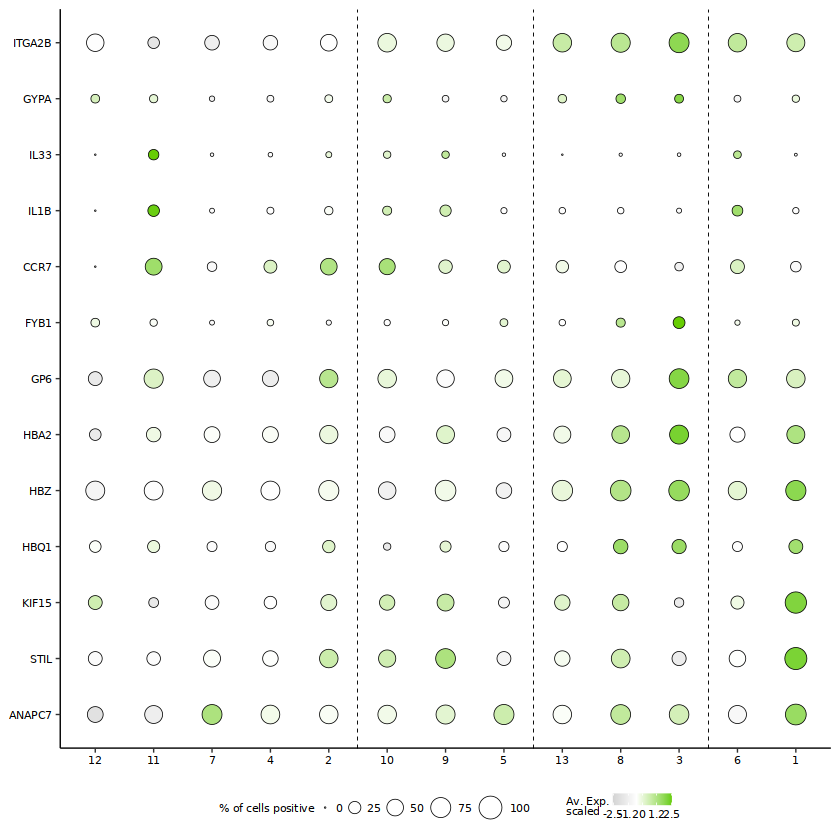

In [84]:
### Define the breaks of percentual expression

breaks_pct.exp<-unique(sort(unique(c(0,seq(0,100, by=25)))))
labels_pct.exp<-as.character(round(breaks_pct.exp,2))

  
cat("labels_pct.exp\n")
cat(sprintf(as.character(labels_pct.exp)))
cat("\n")


### Define the breaks of avg.exp.scaled

indx_avg.exp<-which(colnames(df_dotplot) == 'avg.exp.scaled')

A_avg.exp<-summary(df_dotplot[,indx_avg.exp])



cat("A_avg.exp\n")
cat(sprintf(as.character(names(A_avg.exp))))
cat("\n")
cat(sprintf(as.character(A_avg.exp)))
cat("\n")




max_abs_value<-abs(A_avg.exp[6])
min_abs_value<-abs(A_avg.exp[1])

if(max_abs_value > min_abs_value)
{
  step<-round(abs(max_abs_value--1*max_abs_value)/4,2)
  
  breaks_avg.exp<-unique(sort(round(c(0,max_abs_value,seq(-1*max_abs_value,max_abs_value, by=step)),1)))
  labels_avg.exp<-as.character(breaks_avg.exp)
  
}else{
  
  step<-round(abs(min_abs_value--1*min_abs_value)/4,2)
  
  breaks_avg.exp<-unique(sort(round(c(0,min_abs_value,seq(-1*min_abs_value,min_abs_value, by=step)),1)))
  labels_avg.exp<-as.character(breaks_avg.exp)
  
}# max_abs_value > min_abs_value




cat("labels_avg.exp\n")
cat(sprintf(as.character(labels_avg.exp)))
cat("\n")





Dotplot<-ggplot()+
  geom_point(data=df_dotplot,
             aes(y=Symbol,
                 x=seurat_clusters_by_diff_groups,                       
                 fill=avg.exp.scaled,
                 size=pct.exp),
             stroke=0.25, shape=21,color='black')+
  scale_size(range = c(0,6), name='% of cells positive',
             breaks=breaks_pct.exp, labels=labels_pct.exp, limits=c(breaks_pct.exp[1],breaks_pct.exp[length(breaks_pct.exp)]))+
  scale_fill_gradient2(
    low = "gray", 
    mid = "white", 
    high = "chartreuse3", 
    midpoint = -0.5,
    breaks=breaks_avg.exp,labels=labels_avg.exp,
    limits=c(breaks_avg.exp[1]-0.01,breaks_avg.exp[length(breaks_avg.exp)]+0.01),
    name=paste('Av. Exp.','scaled',sep="\n"),na.value = NA)+       
  scale_x_discrete(name=NULL,drop=F)+
  scale_y_discrete(name=NULL,drop=F)+
  geom_vline(xintercept=c(5.5,8.5,11.5), color="black", linetype='dashed',size=0.2)+
  theme_classic()+
  theme(axis.title=element_blank(),
        axis.title.y=element_blank(),
        axis.title.x=element_blank(),
        axis.text.y=element_text(size=6, color="black", family="sans", face ="italic"),
        axis.text.x=element_text(angle=0,size=6,color="black", family="sans", face ="plain"),
        axis.line.x = element_line(size = 0.3),
        axis.ticks.x = element_line(size = 0.3),
        axis.ticks.y = element_line(size = 0.3),
        axis.line.y = element_line(size = 0.3))+
  theme(legend.title = element_text(size=6),
        legend.text = element_text(size=6),
        legend.key.size = unit(0.25, 'cm'), #change legend key size
        legend.key.height = unit(0.25, 'cm'), #change legend key height
        legend.key.width = unit(0.25, 'cm'), #change legend key width
        legend.position="bottom")+
  ggeasy::easy_center_title()

  

Dotplot

In [85]:
svgname<-paste(paste("Seurat_clusters_Dotplot","marker_genes","wt_cells","after_ordering_clusters", sep='_'),".svg",sep='')
svglite(svgname, width = 3, height = 6)
print(Dotplot)
dev.off()

png 
  2

# Reorder clusters 

In [86]:
summary(adata@meta.data$seurat_clusters)

1    2    3    4    5    6    7    8    9   10   11   12   13 
2811 1737 1584 1552 1052  764  473  305  261  261  241  121   88

In [87]:
adata@meta.data$seurat_clusters_by_diff_groups<-as.character(adata@meta.data$seurat_clusters)

In [88]:
adata@meta.data$seurat_clusters_by_diff_groups<-factor(adata@meta.data$seurat_clusters_by_diff_groups,
                                                      levels=order_cluster_by_diff_groups,
                                                      ordered=TRUE)

In [89]:
summary(adata@meta.data$seurat_clusters_by_diff_groups)

12   11    7    4    2   10    9    5   13    8    3    6    1 
 121  241  473 1552 1737  261  261 1052   88  305 1584  764 2811

In [91]:
adata@meta.data$celltype<-NA

In [92]:
adata@meta.data$celltype[which(adata@meta.data$seurat_clusters_by_diff_groups%in%c('12','11','7','4','2'))]<-'Double_neg'
adata@meta.data$celltype[which(adata@meta.data$seurat_clusters_by_diff_groups%in%c('10','9','5'))]<-'Weak_double_pos'
adata@meta.data$celltype[which(adata@meta.data$seurat_clusters_by_diff_groups%in%c('13','8','3'))]<-'Strong_double_pos'
adata@meta.data$celltype[which(adata@meta.data$seurat_clusters_by_diff_groups%in%c('6','1'))]<-'CD41_single'


In [93]:
summary(as.factor(adata@meta.data$celltype))

CD41_single        Double_neg Strong_double_pos   Weak_double_pos 
             3575              4124              1977              1574

In [94]:
adata@meta.data$celltype<-factor(adata@meta.data$celltype,
                                                      levels=c('Double_neg','Weak_double_pos','Strong_double_pos','CD41_single'),
                                                      ordered=TRUE)

In [95]:
summary(adata@meta.data$celltype)

Double_neg   Weak_double_pos Strong_double_pos       CD41_single 
             4124              1574              1977              3575

# Save annotated object

In [96]:
setwd("/group/soranzo/manuel.tardaguila/2025_K562_multiome_reanalysis/Downstream_analysis/")

In [97]:
saveRDS(adata, file="merged_clusters_final_annotated.rds")